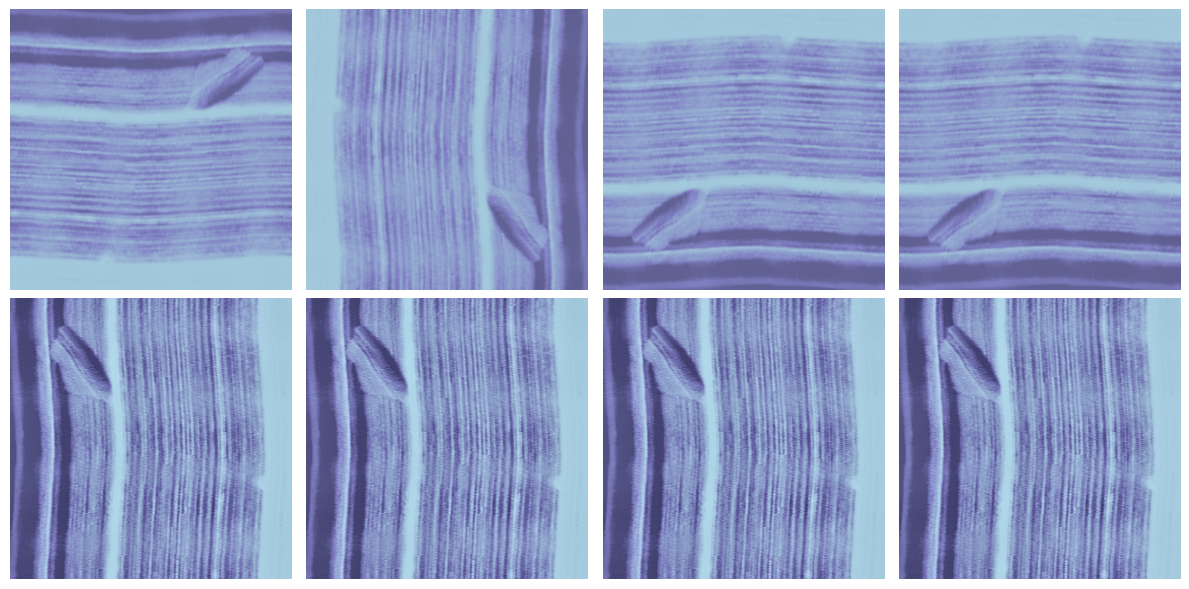

In [4]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# ====== 在這裡一次設定好所有參數 ======
ORIG_ROOT         = r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\dataset\btad"
CATEGORY          = "two"             # ← 原始類別名稱
NEW_CATEGORY      = "newone"          # ← 新增類別名稱
ROT_PER_IMAGE     = 1                   # ← 每張原圖要產生的旋轉增廣張數
DETAIL_PER_IMAGE  = 1                   # ← 每張原圖要產生的細節增強張數
# ======================================

def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
    return cv2.warpAffine(img/255, M, (w, h), borderMode=cv2.BORDER_REFLECT)

def enhance_detail(img):
    # 銳化
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharp = cv2.filter2D(img, -1, kernel)
    # 提升對比度（CLAHE）
    lab = cv2.cvtColor(sharp, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(8,8))
    cl = clahe.apply(l)
    lab = cv2.merge((cl, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

# 載入圖片
src_train = os.path.join(ORIG_ROOT, CATEGORY, "train", "good")
orig_files = sorted(f for f in os.listdir(src_train) if f.lower().endswith(".png"))
img = cv2.imread(os.path.join(src_train, orig_files[0]))  # 只取第一張圖片進行測試

# 進行增強操作並顯示
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(2):
    for j in range(4):
        if i == 0:
            # 旋轉增廣
            angle = random.choice([90, 180, 270])
            aug = rotate_image(img, angle)
        else:
            # 細節增強
            aug = enhance_detail(img)
        
        axs[i, j].imshow(aug)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()
